<a href="https://colab.research.google.com/github/Harsha-057/Codsoft/blob/main/MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import main libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # data visualization, which helps in data exploration and analysis.
from wordcloud import WordCloud #create word clouds, which can be helpful in visualizing word frequency and patterns in text data.

> NLTK (Natural Language Toolkit) is used for natural language processing (NLP) tasks.<br>
> NLTK's stopwords provide a list of common words that can be removed from text data as they usually do not carry meaningful information.<br>
> PorterStemmer is used for text preprocessing by stemming words to their base form.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Loading Dataset
I have use the dataset consist of 3 columns(movieId,title and genres) and total 149532 rows

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CodSoft Datasets/kaggle_movie_train.csv')

In [ ]:
df

,id,text,genres
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


# Performning EDA

In [ ]:
df.columns

Index(['id', 'text', 'genres'], dtype='object')

In [ ]:
df.shape

(22579, 3)

In [ ]:
#checking for missing values in the DataFrame
df.isna().any()

id        False
text      False
genres    False
dtype: bool

In [ ]:
# here will drop the 'id' column from the DataFrame
df.drop(columns='id', inplace=True)

In [ ]:
df

,text,genres
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama
...,...,...
22574,n in the world to decide what I'm going to do ...,drama
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,....with marked skill and dexterity . LANA wry...,action


In [ ]:
# Now we will download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data visualization of 'genre' column from the dataset

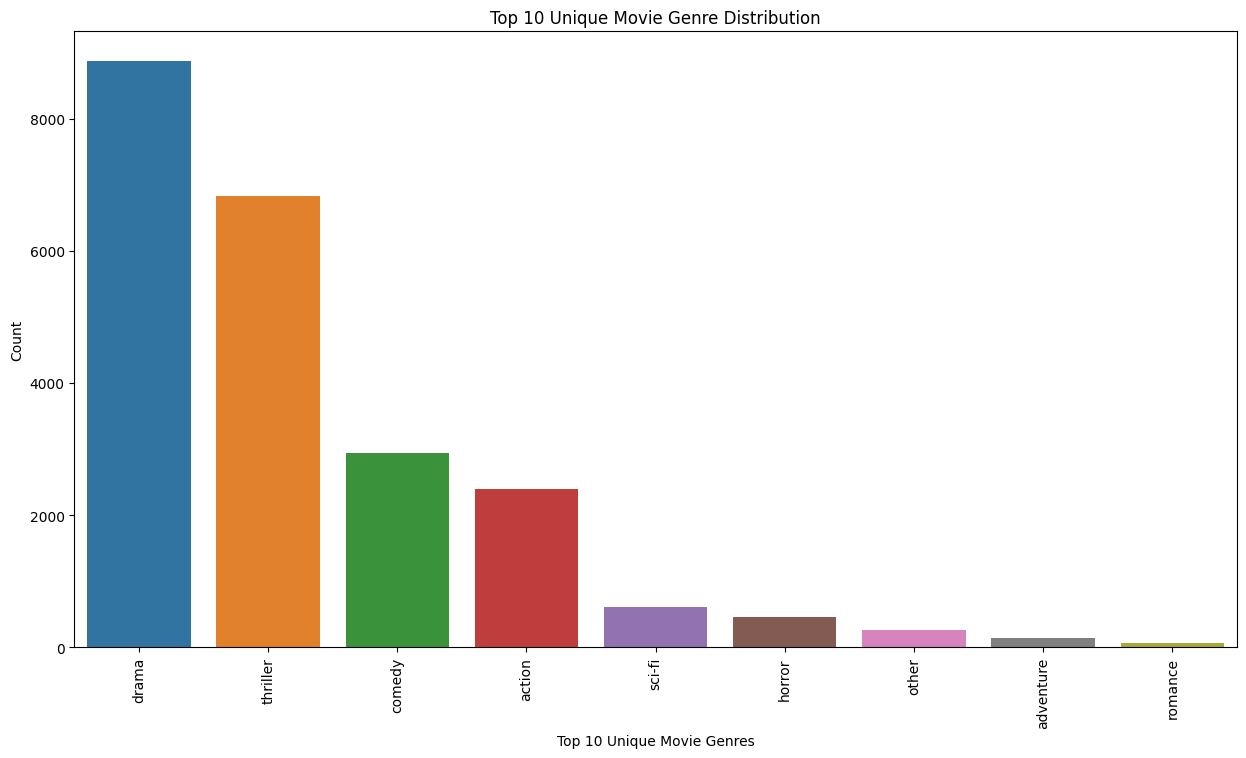

In [ ]:
# List of top 10 unique genres
top_unique_genres = df['genres'].value_counts().nlargest(10).index
plt.figure(figsize=(15, 8))

# Create a countplot to visualize the distribution of the top 10 unique movie genres
sns.countplot(x='genres', data=df, order=top_unique_genres)
plt.xticks(rotation=90)

# Set labels for the x and y-axes
plt.xlabel('Top 10 Unique Movie Genres')
plt.ylabel('Count')
plt.title('Top 10 Unique Movie Genre Distribution')

# Display the plot
plt.show()


# Data Cleaning and Preprocessing

In [ ]:
import re
preprocessed_corpus = []
stemmer = PorterStemmer() # Create a PorterStemmer instance
for i in range(0, df.shape[0]):
  # Steps we will perform are:
# Clean the text by removing special characters
    cleaned_text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'].iloc[i])

# Convert the text to lowercase
    lowercase_text = cleaned_text.lower()

# Tokenize the text into words
    words = lowercase_text.split()

# Remove stop words
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

# Stem the words
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

# Join the stemmed words :)
    preprocessed_text = ' '.join(stemmed_words)

# Append the preprocessed text to the corpus
    preprocessed_corpus.append(preprocessed_text)
# All done

In [ ]:
preprocessed_corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [ ]:
len(preprocessed_corpus)

22579

### here we will create a lists for each genre are organized into a dictionary to improve readability and maintainability.

In [ ]:
genre_lists = {
    'drama': [],
    'comedy': [],
    'thriller': [],
    'horror': [],
}
for genre_label in genre_lists:
    genre_indices = list(df[df['genres'] == genre_label].index)
    genre_lists[genre_label] = [preprocessed_corpus[i] for i in genre_indices]

# Initialize empty strings for each genre
genre_texts = {genres: '' for genres in genre_lists}

# Find the minimum length of the lists in genre_lists
min_length = min(len(genre_lists[genres]) for genres in genre_lists)

# Concatenate words for each genre
for i in range(min_length):
    for genres in genre_texts:
        genre_texts[genres] += genre_lists[genres][i]

In [ ]:
# Access the concatenated texts for each genre
drama = genre_texts['drama']
print(drama)
comedy = genre_texts['comedy']
thriller = genre_texts['thriller']
horror = genre_texts['horror']

come surpris take hand lead hallway salvator look feel pang seem smaller age wither bodi slightli stoop hair gather knot back head must tire want rest time funer salvator interrupt mamma take hour air know maria smile iron tell year salvator get messag feel guilti think seem incred never come maria open door step asid let son whisper put thing go go salvator lake step flabbergast sight old room perfectli reconstruct preserv look like museum museum past despit bed cloth cupboard book shelv perfectli clear one ever livend dismount children reach throw arm embrac charlott hurri behind martin lock eye envelop hug children ext fresh water plantat even summer oak tree cover leav martin hous partial rebuilt habit workshop alreadi complet martin children nathan samuel margaret william play tall grass front hous two great dane charlott sit front porch nurs infant martin walk workshop trail susan carri complet rock chair chair work art thin light spider web perfectli turn wood nail glue step ont

## Creating wordcloud for Drama genre

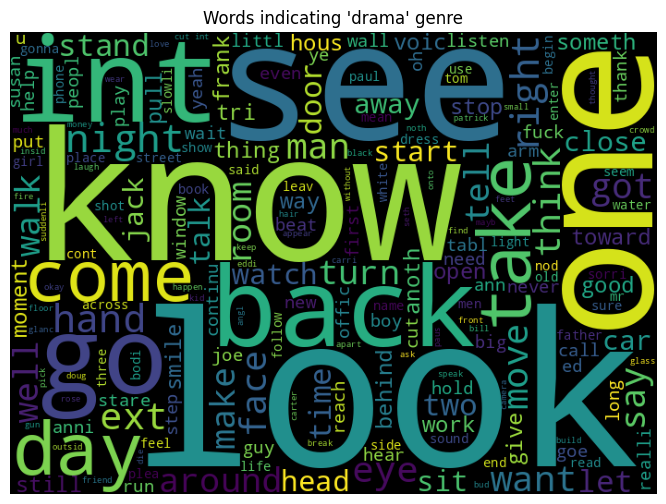

In [ ]:
drama_text = genre_texts['drama']
if drama_text:
      # Create and display the word cloud
      wordcloud = WordCloud(background_color='black', width=700, height=500).generate(drama_text)
      plt.figure(figsize=(15,6))
      plt.imshow(wordcloud)
      plt.axis('off')
      plt.title("Words indicating 'drama' genre")
      plt.show()
else:
      print("No data available for the 'drama' genre.")

## Creating wordcloud for Comedy genre

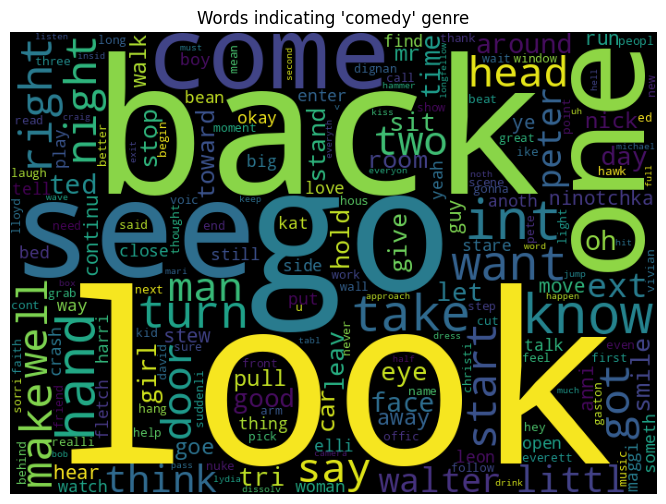

In [ ]:
comedy_text = genre_texts['comedy']
if comedy_text:
      # Create and display the word cloud
      wordcloud = WordCloud(background_color='black', width=700, height=500).generate(comedy_text)
      plt.figure(figsize=(15,6))
      plt.imshow(wordcloud)
      plt.axis('off')
      plt.title("Words indicating 'comedy' genre")
      plt.show()
else:
      print("No data available for the 'comedy' genre.")


## Creating wordcloud for Thriller genre

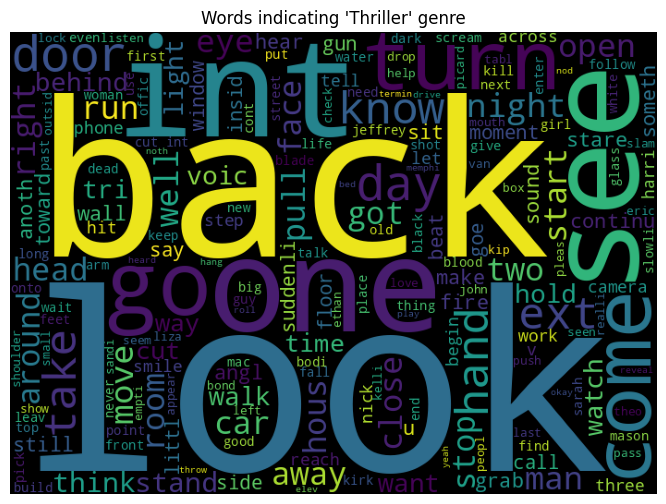

In [ ]:
thriller_text = genre_texts['thriller']
if thriller_text:
      # Create and display the word cloud
      wordcloud = WordCloud(background_color='black', width=700, height=500).generate(thriller_text)
      plt.figure(figsize=(15,6))
      plt.imshow(wordcloud)
      plt.axis('off')
      plt.title("Words indicating 'Thriller' genre")
      plt.show()
else:
      print("No data available for the 'Thriller' genre.")


## Creating wordcloud for Horror genre

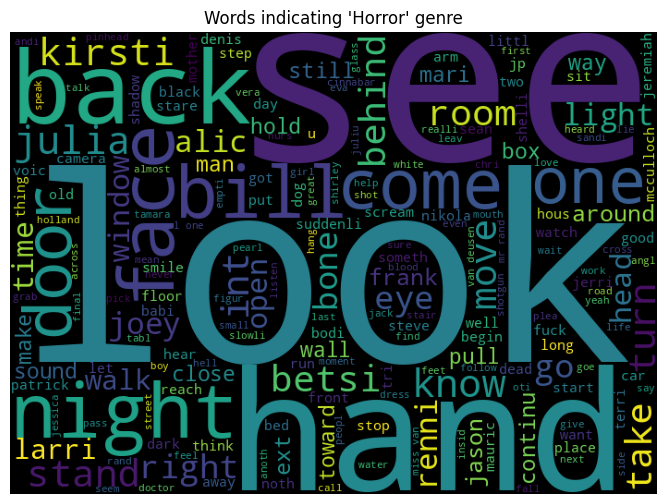

In [ ]:
horror_text = genre_texts['horror']
if horror_text:
      # Create and display the word cloud
      wordcloud = WordCloud(background_color='black', width=700, height=500).generate(horror_text)
      plt.figure(figsize=(15,6))
      plt.imshow(wordcloud)
      plt.axis('off')
      plt.title("Words indicating 'Horror' genre")
      plt.show()
else:
      print("No data available for the 'Horror' genre.")


## Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=20000, ngram_range=(1,2))
X = cv.fit_transform(preprocessed_corpus).toarray()

In [ ]:
y = df['genres'].values

# Building Model ✌

**Spliting data into training and testing sets, with 80% of the data in X and y used for training and 20% for testing.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 20000), X_test size: (4516, 20000)


## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_predict = nb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Now we will Calculate accuracy
accuracy = accuracy_score(y_test, nb_predict)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 91.03%


In [ ]:
# Generate and print a classification report
class_report = classification_report(y_test, nb_predict)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      action       0.88      0.96      0.91       476
   adventure       1.00      0.80      0.89        45
      comedy       0.90      0.93      0.91       559
       drama       0.94      0.90      0.92      1827
      horror       0.79      0.78      0.79        82
       other       0.98      0.94      0.96        66
     romance       1.00      0.82      0.90        11
      sci-fi       0.84      0.86      0.85       132
    thriller       0.90      0.92      0.91      1318

    accuracy                           0.91      4516
   macro avg       0.91      0.88      0.89      4516
weighted avg       0.91      0.91      0.91      4516



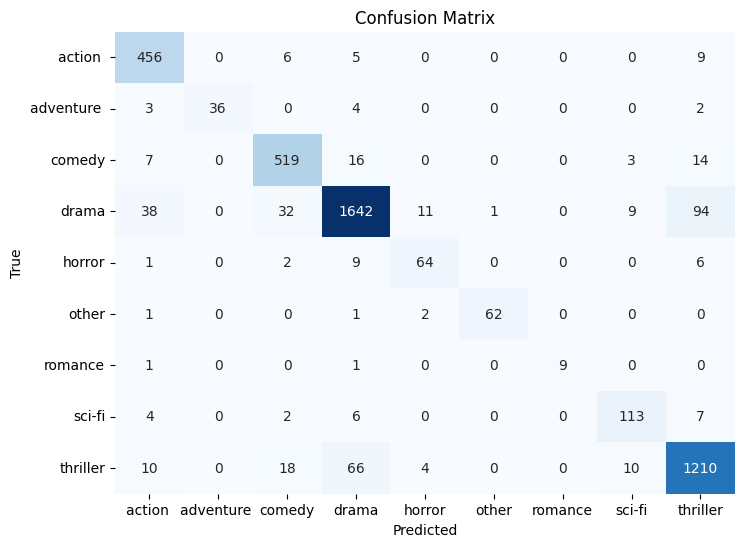

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, nb_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['action ', 'adventure ', 'comedy','drama','horror','other','romance','sci-fi','thriller'],
            yticklabels=['action ', 'adventure ', 'comedy','drama','horror','other','romance','sci-fi','thriller'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()